# Shakespeare

# Essential Purpose

Language modelling: using Keras implementation of recurrent neural networks (RNNs) for building a simple language model for natural language processing (NLP).

In this mission, you will work on Shakespeare text data to make your own language model using RNNs.

# Requirements

In this mission, you will use a text from Shakespeare (Shakespeare’s first sonnet) to train a recurrent neural network (RNN) for language modelling. You can use any editor, such as Jupyter Notebook or Spyder, to complete this mission in your computer.

Write code that uses the Keras library to build, train, and test an RNN with the architecture described.

Submission of your project on GitHub is optional. If you choose to manage your project using GitHub, find guidelines for using GitHub here. Ensure you are coding using your Jupyter Notebook – it will be uploaded to GitHub when you perform a Git push operation.

You are expected to write around 25 lines of code to complete this project.

In [1]:
# 1. Read the text file (the poem is Shakespeare’s first sonnet from the “Fair Youth” sequence).
# Read the file into a string. In this section, you will use the following command:

with open('alllines_start.txt', 'r') as file:
    text = file.read()
    lines = text.lower().split('\n')

In [2]:
#Define words, vocabulary size and sequences of words as lines
from keras.preprocessing.text import text_to_word_sequence, Tokenizer
words = text_to_word_sequence(text)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(words)
vocabulary_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(lines)

#Find subsequences 
subsequences = []
for sequence in sequences:
    for i in range(1, len(sequence)):
        subsequence = sequence[:i+1]
        subsequences.append(subsequence)

In [3]:
# padding sequences

from keras.preprocessing.sequence import pad_sequences
sequence_length = max([len(sequence) for sequence in sequences])
sequences = pad_sequences(subsequences, maxlen=sequence_length, padding='pre')      

In [4]:
# encode the target labels

from tensorflow.keras.utils import to_categorical
x, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocabulary_size)

In [5]:
import numpy as np
np.shape(x)

(1789, 15)

In [6]:
x[1,14]

144

Define an RNN with the following layers:

An embedding layer with the following parameters:

The input dimension is vocabulary_size

The output dimension is 100

The input length is sequence_length - 1

An LSTM layer with 100 units

A dropout layer with a dropout rate of 10%

A dense layer with the following parameters:

Activation function is softmax

The number of units is vocabulary_size

In [7]:
from tensorflow.keras.models import Sequential
model = Sequential()

from tensorflow.keras.layers import Embedding
model.add(Embedding(vocabulary_size, 100, input_length=sequence_length - 1))

from tensorflow.keras.layers import LSTM
model.add(LSTM(100))

from tensorflow.keras.layers import Dropout
model.add(Dropout(0.1))

from tensorflow.keras.layers import Dense
model.add(Dense(units=vocabulary_size, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           76500     
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 765)               77265     
                                                                 
Total params: 234,165
Trainable params: 234,165
Non-trainable params: 0
_________________________________________________________________


In [9]:
# build the model - choose hyperparameters
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x, y, epochs=10)

Epoch 1/10
56/56 [==============================] - 5s 20ms/step - loss: 6.3540 - accuracy: 0.0419
Epoch 2/10
56/56 [==============================] - 1s 20ms/step - loss: 5.8947 - accuracy: 0.0492
Epoch 3/10
56/56 [==============================] - 1s 17ms/step - loss: 5.8310 - accuracy: 0.0375
Epoch 4/10
56/56 [==============================] - 1s 21ms/step - loss: 5.7513 - accuracy: 0.0458
Epoch 5/10
56/56 [==============================] - 1s 15ms/step - loss: 5.6610 - accuracy: 0.0576
Epoch 6/10
56/56 [==============================] - 1s 17ms/step - loss: 5.5723 - accuracy: 0.0704
Epoch 7/10
56/56 [==============================] - 1s 19ms/step - loss: 5.4980 - accuracy: 0.0727
Epoch 8/10
56/56 [==============================] - 1s 17ms/step - loss: 5.4148 - accuracy: 0.0760
Epoch 9/10
56/56 [==============================] - 1s 13ms/step - loss: 5.3313 - accuracy: 0.0805
Epoch 10/10
56/56 [==============================] - 1s 16ms/step - loss: 5.2484 - accuracy: 0.0861


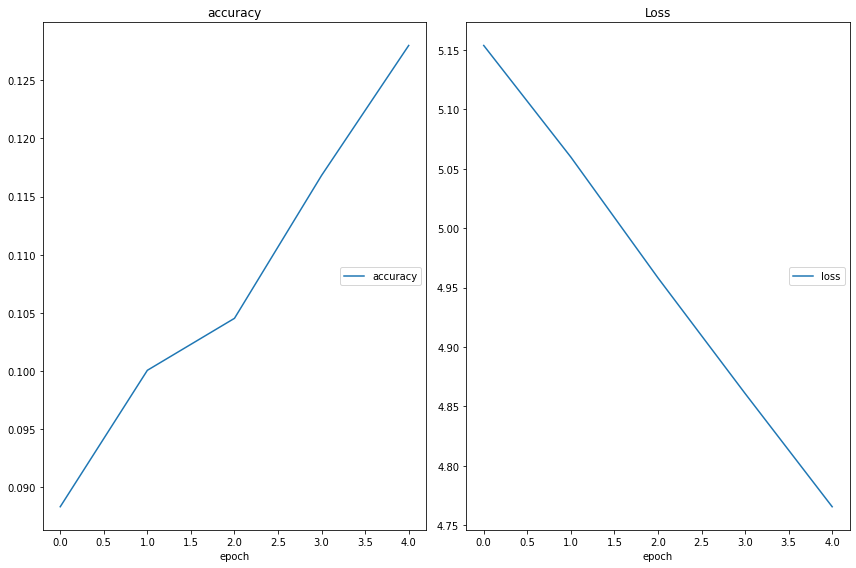

accuracy
	accuracy         	 (min:    0.088, max:    0.128, cur:    0.128)
Loss
	loss             	 (min:    4.765, max:    5.154, cur:    4.765)
56/56 [==============================] - 3s 50ms/step - loss: 4.7655 - accuracy: 0.1280


In [11]:
from livelossplot import PlotLossesKeras
model.fit(x,y,
         callbacks = [PlotLossesKeras()],
         epochs = 5)

In [12]:
scores = model.evaluate(x,y,verbose=0)
print(f"{model.metrics_names[1]} = {scores[1]*100}")

accuracy = 14.141978323459625
